# Lab 9: Grid Localization using Bayes Filter on the Virtual Robot

#### <span style="color:rgb(0,150,0)">It is recommended that you close any heavy-duty applications running on your system while working on this lab.</span>

#### This notebook showcases localization results of the **Localization** module (defined in *robot_interface.py*) for the virtual robot.

<hr>


In [1]:
# Automatically reload changes in python modules
%load_ext autoreload
%autoreload 2

# Import classes
from robot_interface import *

import time
import numpy as np
import rospy
from Traj import Trajectory

In [2]:
from gridmap import OccupancyGridMap
import matplotlib.pyplot as plt
from a_star import a_star
from utils import plot_path

In [3]:
# Instantiate VirtualRobot to communicate with the real robot
robot = VirtualRobot()

# Instantiate Mapper
# Start points for each line segment describing the map
start_points = np.array([[0,0],
                         [3.04,0],
                         [3.04,3.04],
                         [0,3.04],
                         [0,0],
                         [0,0.608],
                         [0.608,0.608],
                         [0.608,0.912],
                         [0,0.912],
                         [0,2.128],
                         [1.216,2.128],
                         [1.216,1.52],
                         [2.584,1.52],
                         [2.584,0.912],
                         [1.52,0.304]])

# End points for each line segment describing the map
end_points = np.array([  [3.04,0],
                         [3.04,3.04],
                         [0,3.04],
                         [0,0],
                         [0,0.608],
                         [0.608,0.608],
                         [0.608,0.912],
                         [0,0.912],
                         [0,2.128],
                         [1.216,2.128],
                         [1.216,1.52],
                         [2.584,1.52],
                         [2.584,0.912],
                         [1.52,0.304],
                         [0,0]])

# Requires a RealRobot object as input
mapper = Mapper(min_x=0, max_x=3.04, min_y=0, max_y=3.04, min_a=-180, max_a=180,
                cell_size_x=0.152, cell_size_y=0.152, cell_size_a=20,
                max_cells_x=20, max_cells_y=20, max_cells_a=18,
                ray_length=7, lines=[start_points, end_points], obs_per_cell=18, 
                robot=robot)
#mapper.populate_views()

# Instantiate Localization 
odom_trans_sigma = 0.33
odom_rot_sigma = 15
sensor_sigma = 0.11

# Requires a RealRobot object and a Mapper object as inputs
loc = Localization(robot, mapper, sensor_sigma, odom_trans_sigma, odom_rot_sigma)

# Visualize the map (described using line segments) in the plotter
loc.plotter.visualize_map()

Using python version: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0] 

Initializing Node
Initializing Virtual Robot
Initializing beliefs with a Uniform Distribution
Uniform Belief with each cell value:  0.0001388888888888889


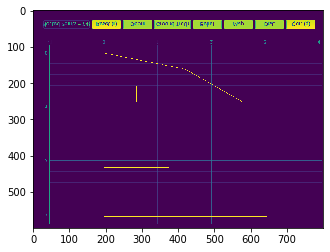

In [4]:
import subprocess

subprocess.run(["/bin/bash","-c", "wmctrl -a 'Plotter'"])
subprocess.run(["/bin/bash","-c","scrot -d 4 -u -quality 100 map.png"])
gmap = OccupancyGridMap.from_png('map.png', 1)
gmap.plot()

Start cell:  (7, 4)
Goal cell:  (14, 10)


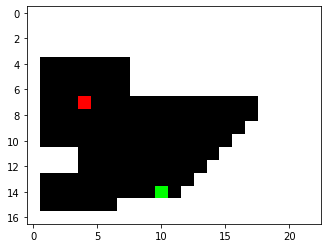

-----------------
[7 4]
[7 5]
[7 6]
[7 7]
[7 8]
[7 9]
[ 7 10]
[ 8 10]
[ 9 10]
[10 10]
[11 10]
[12 10]
[13 10]
[14 10]


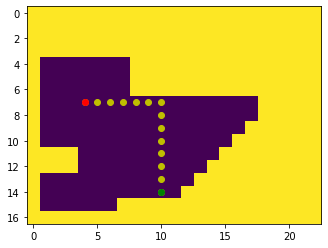

Start cell:  (12, 9)
Goal cell:  (6, 4)


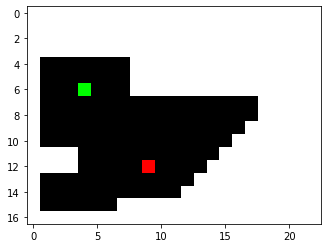

-----------------
[12  9]
[11  9]
[10  9]
[9 9]
[8 9]
[7 9]
[7 8]
[7 7]
[6 7]
[6 6]
[6 5]
[6 4]


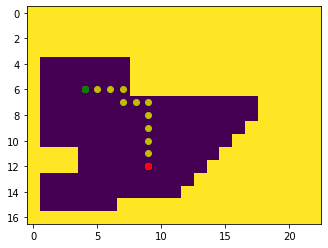

Start cell:  (11, 11)
Goal cell:  (7, 2)


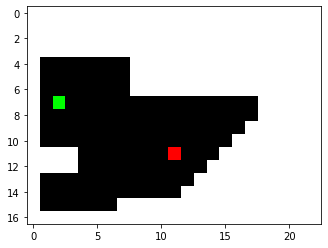

-----------------
[11 11]
[10 11]
[ 9 11]
[ 8 11]
[ 7 11]
[ 7 10]
[7 9]
[7 8]
[7 7]
[7 6]
[7 5]
[7 4]
[7 3]
[7 2]


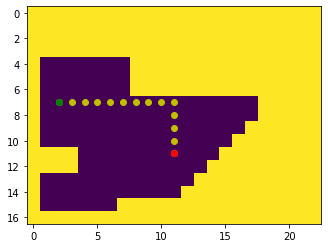

Start cell:  (12, 10)
Goal cell:  (4, 7)


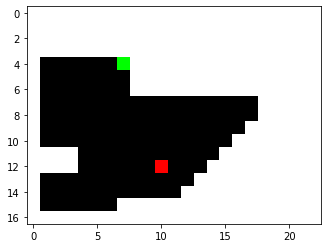

-----------------
[12 10]
[11 10]
[10 10]
[ 9 10]
[ 8 10]
[ 7 10]
[7 9]
[7 8]
[7 7]
[6 7]
[5 7]
[4 7]


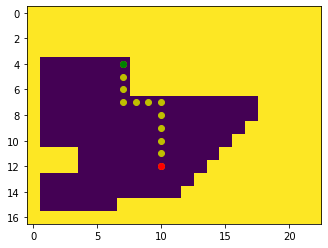

Start cell:  (14, 8)
Goal cell:  (6, 2)


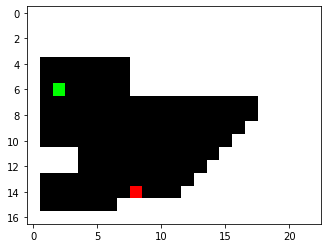

-----------------
[14  8]
[13  8]
[12  8]
[11  8]
[10  8]
[9 8]
[8 8]
[7 8]
[7 7]
[6 7]
[6 6]
[6 5]
[6 4]
[6 3]
[6 2]


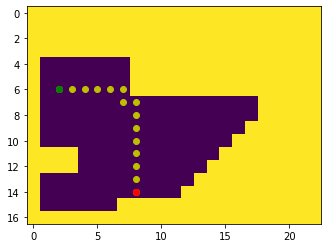

Start cell:  (11, 6)
Goal cell:  (8, 13)


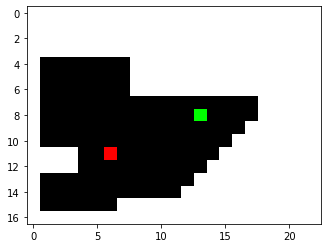

-----------------
[11  6]
[10  6]
[9 6]
[8 6]
[8 7]
[8 8]
[8 9]
[ 8 10]
[ 8 11]
[ 8 12]
[ 8 13]


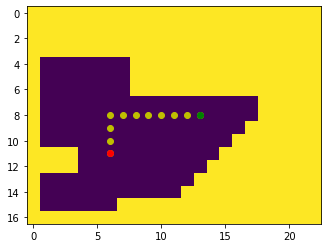

Start cell:  (12, 11)
Goal cell:  (7, 5)


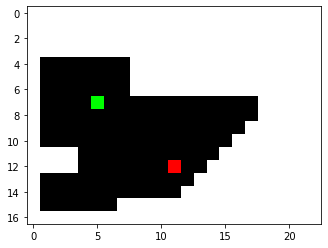

-----------------
[12 11]
[11 11]
[10 11]
[ 9 11]
[ 8 11]
[ 7 11]
[ 7 10]
[7 9]
[7 8]
[7 7]
[7 6]
[7 5]


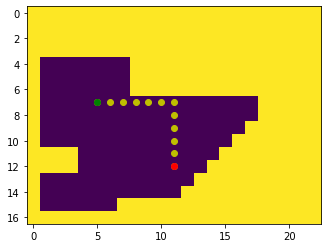

Start cell:  (10, 13)
Goal cell:  (12, 4)


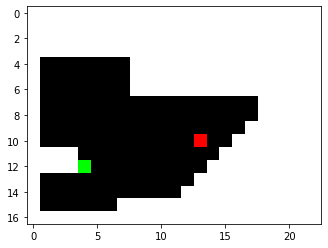

KeyboardInterrupt: 

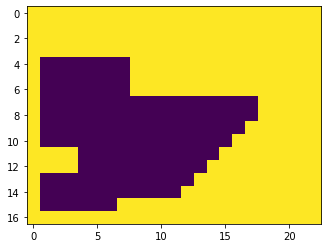

In [21]:
from planner_query import *

grid =  [ 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,
          1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,
          1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
grid = np.array(grid, dtype=np.uint8)
grid.resize(17,23)

# Instantiate the class PlannerQuery
pq = PlannerQuery(grid)
        
for i in range(0,10):
    # Generate a start and goal pair
    (start_node, goal_node) = pq.generate(plot=True)
    gmap = OccupancyGridMap.from_data(grid,1,1)
    gmap.plot()
    print("-----------------")
    path, path_px = a_star(start_node, goal_node, gmap,movement="4N")


    if path:
        # plot resulting path in pixels over the map
        #plot_path(path_px)
        path_arr = np.array(path)
        for i in path_arr:
            loc.plotter.plot_point((i[1])*0.152, (17-i[0])*0.152, GT)
        start_node_px = gmap.get_index_from_coordinates(start_node[0], start_node[1])
        goal_node_px = gmap.get_index_from_coordinates(goal_node[0], goal_node[1])

        plt.plot(path_arr[:, 1], path_arr[:, 0], 'yo')
        plt.plot(start_node_px[1], start_node_px[0], 'ro')
        plt.plot(goal_node_px[1], goal_node_px[0], 'go')
    else:
        print('Goal is not reachable')

        # plot start and goal points over the map (in pixels)
        start_node_px = gmap.get_index_from_coordinates(start_node[0], start_node[1])
        goal_node_px = gmap.get_index_from_coordinates(goal_node[0], goal_node[1])

        plt.plot(start_node_px[1], start_node_px[0], 'ro')
        plt.plot(goal_node_px[1], goal_node_px[0], 'go')

    plt.show()

In [14]:
cx,cy,ca = mapper.to_map(0,2.128,0)
#mapper.get_views(cx,cy,ca)

# Bayes filter on the virtual robot
The cell below run the bayes filter algorithm for the pre-planned trajectory.

In [8]:
# Reset Plots
robot.reset()
loc.plotter.reset_plot()

# Init Uniform Belief
loc.init_pose()

# Get Observation Data by executing a 360 degree rotation motion
loc.get_observation_data()

# Run Update Step
loc.update_step()
loc.print_update_stats(plot_data=True)
    
# Intialize the Trajectory object
traj = Trajectory(loc)

# Run through each motion steps
for t in range(0, traj.total_time_steps):

    print("\n\n-----------------", t, "-----------------")
    
    prev_odom, current_odom, prev_gt, current_gt = traj.execute_time_step(t)
    
    # Prediction Step
    loc.prediction_step(current_odom, prev_odom)
    loc.print_prediction_stats(plot_data=True)
    
    # Get Observation Data by executing a 360 degree rotation motion
    loc.get_observation_data()
    
    # Update Step    
    loc.update_step()
    loc.print_update_stats(plot_data=True)
    
        
    print("-------------------------------------")

 | Resetting Robot pose
Initializing beliefs with a Uniform Distribution
Uniform Belief with each cell value:  0.0001388888888888889
 | Executing Observation Loop at: 30 deg/s
Update Step
     | Update Time:  0.011184930801391602

---------- UPDATE STATS -----------
GT index      :  (10, 10, 8)
Bel index     :  (0, 0, 0) with prob =  0.0001388
Bel_bar prob at index =  0.0001388888888888889

GT     : (0.000, 0.000, -0.000)
Belief   : (0.076, 0.076, -170.000)
POS ERROR : (-0.076, -0.076, 170.000)
---------- UPDATE STATS -----------


----------------- 0 -----------------
 | Resetting Robot pose
Prediction Step
Uniform Belief with each cell value:  0.0
     | Prediction Time:  0.018720149993896484

---------- PREDICTION STATS -----------
GT index            :  (12, 9, 7)
Prior Bel index     :  (0, 0, 0) with prob =  nan
POS ERROR      : (0.274, -0.162, 147.082)


/home/artemis/Desktop/ece4960/lab10/lab10_jupyter/scripts/robot_interface.py:557: RuntimeWarning: invalid value encountered in true_divide
  self.bel_bar = self.bel_bar / np.sum(self.bel_bar)


---------- PREDICTION STATS -----------
 | Executing Observation Loop at: 30 deg/s
Update Step
     | Update Time:  0.008562088012695312

---------- UPDATE STATS -----------
GT index      :  (12, 9, 7)
Bel index     :  (0, 0, 0) with prob =  nan
Bel_bar prob at index =  nan

GT     : (0.350, -0.086, -22.918)
Belief   : (0.076, 0.076, -170.000)
POS ERROR : (0.274, -0.162, 147.082)
---------- UPDATE STATS -----------
-------------------------------------


----------------- 1 -----------------
Prediction Step
Uniform Belief with each cell value:  0.0
     | Prediction Time:  0.0028591156005859375

---------- PREDICTION STATS -----------
GT index            :  (14, 7, 8)
Prior Bel index     :  (0, 0, 0) with prob =  nan
POS ERROR      : (0.535, -0.491, 166.562)
---------- PREDICTION STATS -----------
 | Executing Observation Loop at: 30 deg/s
Update Step
     | Update Time:  0.010214090347290039

---------- UPDATE STATS -----------
GT index      :  (14, 7, 8)
Bel index     :  (0, 0, 0) wi

KeyboardInterrupt: 